In [3]:
from tensorflow import keras
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [4]:
parent_dir_path = os.path.dirname(os.getcwd())
parent_dir_path = parent_dir_path.replace("\\", "/")

In [31]:
model = keras.models.load_model('MobileNet_trained.h5')

In [8]:
test_data_file = parent_dir_path + "/DataPreparation/MobileNet_Data/test_60_records_from_Schleusinger-Allee.hdf5"
test_data = pd.read_hdf(test_data_file, "IDMT_traffic")
test_soundmaps = tf.stack(test_data.SoundMap.to_numpy())

In [32]:
test_preds = model.predict(test_soundmaps, 
                           batch_size=64, verbose=True)

1/1 [==============================] - 0s 415ms/step


In [12]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
all_labels = lab_enc.fit_transform(['L', 'None', 'R'])

In [33]:
predictions = lab_enc.classes_[np.argsort(-test_preds, axis=1)[:, :1]]
y_pred = [' '.join([cat for cat in row]) for row in predictions]

In [35]:
def f_measure(Y_true, Y_pred):
    true_positives = 0
    false_positives = 0
    true_elements = Y_true.count('L') + Y_true.count('R')
    
    for i in range(len(Y_true)):
        if Y_true[i] == Y_pred[i]:
            if Y_pred[i] != 'None':
                true_positives += 1
        elif Y_pred[i] != 'None':
            false_positives += 1
            print(f"index of false_positive: {i}")
        else:
            print(f"index of false_negative: {i}")
    
    precision = true_positives/(true_positives+false_positives)
    recall = true_positives/true_elements
    f = 2*precision*recall/(precision+recall)
    print(f"Precision: {precision}, Recall: {recall}, F-measure: {f}")
    return f

In [21]:
y_true = test_data.source_direction.to_list()

In [36]:
f_measure(y_true, y_pred)

index of false_positive: 43
Precision: 0.9705882352941176, Recall: 1.0, F-measure: 0.9850746268656716


0.9850746268656716

In [37]:
test_data['file'].iloc[43]

'2019-11-12-09-00_Schleusinger-Allee_70Kmh_13662720_SE_CH34-BG.wav'

In [41]:
wrong_test = tf.stack([test_data.SoundMap.iloc[43]])

In [42]:
wrong_prediction = model.predict(wrong_test, 
                           batch_size=64, verbose=True)

1/1 [==============================] - 0s 20ms/step


In [43]:
wrong_prediction

array([[0.02113105, 0.00769971, 0.9711692 ]], dtype=float32)

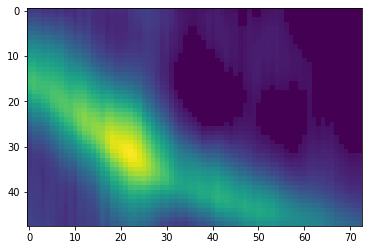

In [47]:
import sys
sys.path.append(parent_dir_path)
from SoundMap.TimeDelay import *
plot_time_delays(np.array(wrong_test[0]))

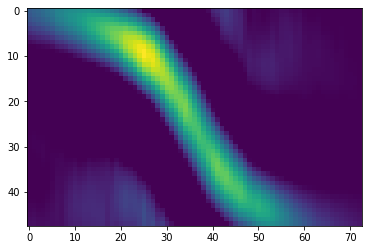

In [48]:
plot_time_delays(np.array(test_soundmaps[0]))